Sakshi Kulshreshtha: 16BCE1198

Iris Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [4]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [6]:
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))

In [7]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

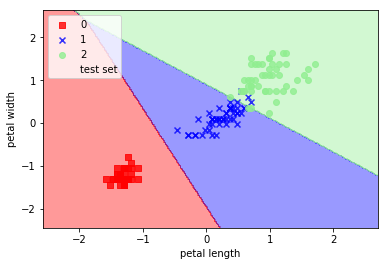

In [9]:
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(100,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [10]:
lr.predict_proba(X_test_std[0:45,])

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01],
       [  6.08753106e-04,   9.99285569e-01,   1.05678028e-04],
       [  8.16962653e-01,   1.83037347e-01,   6.48299403e-14],
       [  1.60866539e-11,   4.14084479e-01,   5.85915521e-01],
       [  8.00231776e-01,   1.99768224e-01,   1.07576258e-13],
       [  2.03283749e-13,   1.38353563e-01,   8.61646437e-01],
       [  8.64726967e-01,   1.35273033e-01,   9.27705289e-14],
       [  4.92680691e-07,   7.61844645e-01,   2.38154862e-01],
       [  6.63326495e-07,   8.43292211e-01,   1.56707126e-01],
       [  8.06447009e-05,   9.97737477e-01,   2.18187798e-03],
       [  9.03984802e-09,   4.62107297e-01,   5.37892694e-01],
       [  1.54213753e-06,   8.75626483e-01,   1.24371975e-01],
       [  5.21240195e-06,   9.81860065e-01,   1.81347231e-02],
       [  8.78337572e-07,   8.24894420e-01,   1.75104701e-01],
       [  1.13609831e-06,   8.90634747e-01,   1.09364117e-01],
       [  7.63277074e-01,   2.36722926e-01,   4.4802826

In [ ]:
#The model predicts that there is 93.68% chance that the first sample is Iris Virginica and 6.31% that it is Iris Versicolor.

In [12]:
lr.predict(X_test_std[0:45,])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0])

In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" %accuracy_score(y_test,lr.predict(X_test_std[0:45,])))

Accuracy: 0.98


OULAD Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("E:/SEM 5/MACHINE LEARNING/LAB/Dataset-OULAD/StudentInfoPreprocessed.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,3] = labelencoder.fit_transform(df.iloc[:,3])
df.iloc[:,4] = labelencoder.fit_transform(df.iloc[:,4])
df.iloc[:,5] = labelencoder.fit_transform(df.iloc[:,5])
df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6])
df.iloc[:,7] = labelencoder.fit_transform(df.iloc[:,7])
df.iloc[:,10] = labelencoder.fit_transform(df.iloc[:,10])
df.iloc[:,11] = labelencoder.fit_transform(df.iloc[:,11])

In [4]:
X=np.array(df.iloc[:,[5,9,10,11]])
y=np.array(df.iloc[:,-1])

In [6]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
lr.predict_proba(X_test)

array([[  4.83354587e-01,   3.64822520e-01,   1.51822893e-01,
          4.09690536e-18],
       [  2.75635536e-04,   6.63312159e-01,   3.36412205e-01,
          5.61145244e-11],
       [  1.76310592e-04,   6.55677151e-01,   3.44146538e-01,
          7.74836678e-11],
       ..., 
       [  1.01177112e-19,   1.93630335e-02,   3.15607433e-01,
          6.65029533e-01],
       [  9.49913755e-12,   2.87259219e-01,   7.11938724e-01,
          8.02057283e-04],
       [  5.48248892e-12,   1.76323800e-01,   8.22705608e-01,
          9.70592326e-04]])

In [9]:
y_predict=lr.predict(X_test)
y_predict

array([0, 1, 1, ..., 3, 2, 2], dtype=int32)

In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" %accuracy_score(y_test,y_predict))

Accuracy: 0.94
